# **Intro**
Rhys Wachter 
CSIS-126E-1157

In [1]:
# We will be training our ML model on video game sales data and critic scores. I want to predict critic scores off of sales data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/video-game-sales-2024/vgchartz-2024.csv


In [2]:
# Load the dataset
df_vgSales = pd.read_csv('/kaggle/input/video-game-sales-2024/vgchartz-2024.csv')
df_vgSales

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


# **Preprocessing**

In [3]:
# Time to explore and clean up the data!

# We will remove unneeded columns; utilizing a list for this makes it faster and more concise:
drop_columns = ["img", "title", "console", "publisher", "developer", "genre", "jp_sales","other_sales", "release_date", "last_update"]
df_vgSales.drop(drop_columns, axis=1, inplace=True)

df_vgSales

,critic_score,total_sales,na_sales,pal_sales
0,9.4,20.32,6.37,9.85
1,9.7,19.39,6.06,9.71
2,9.6,16.15,8.41,5.49
3,NaN,15.86,9.06,5.33
4,8.1,15.09,6.18,6.05
...,...,...,...,...
64011,NaN,NaN,NaN,NaN
64012,NaN,NaN,NaN,NaN
64013,NaN,NaN,NaN,NaN
64014,NaN,NaN,NaN,NaN


In [4]:
# Now let's scramble it, because it starts out organized from highest total sales to lowest.
df_vgSales = df_vgSales.sample(frac=1, random_state=42)

# We need to remove any NaN/Unknown values:
df_vgSales.dropna(inplace=True)

# Along with removing rows containing 0 sales:
df_vgSales = df_vgSales[(df_vgSales != 0).all(axis=1)]

# We also need to reset the index:
df_vgSales = df_vgSales.reset_index(drop = True)

df_vgSales

,critic_score,total_sales,na_sales,pal_sales
0,8.1,0.53,0.49,0.03
1,9.2,2.91,1.83,0.79
2,7.0,4.10,1.20,2.60
3,5.4,0.44,0.07,0.05
4,10.0,1.11,0.61,0.38
...,...,...,...,...
3164,4.3,0.83,0.52,0.25
3165,8.3,3.54,1.56,1.40
3166,9.2,0.23,0.11,0.10
3167,6.5,0.66,0.16,0.40


<Axes: xlabel='critic_score', ylabel='total_sales'>

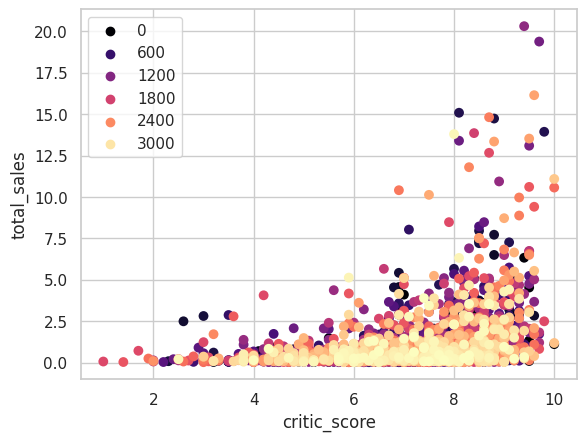

In [5]:
# Now let's visualize what data is left as a scatterplot; plotting critic scores vs each respective sales.
# This will give us a loose idea of the correlation (or lack thereof) between a game's score and how well it did financially.

sns.set_theme(style='whitegrid')

# Total sales vs Critic scores:
sns.scatterplot(x='critic_score', y='total_sales',
               hue=df_vgSales.index, palette='magma', s=50,
               sizes=(10, 6), linewidth=0,
               data=df_vgSales)

<Axes: xlabel='critic_score', ylabel='na_sales'>

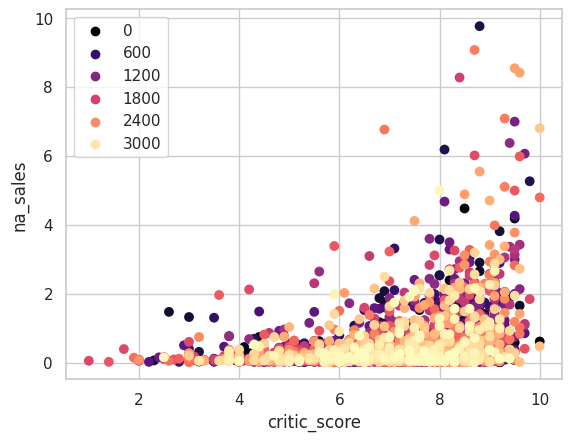

In [6]:
# North America sales vs Critic scores:
sns.scatterplot(x='critic_score', y='na_sales',
               hue=df_vgSales.index, palette='magma', s=50,
               sizes=(10, 6), linewidth=0,
               data=df_vgSales)

<Axes: xlabel='critic_score', ylabel='pal_sales'>

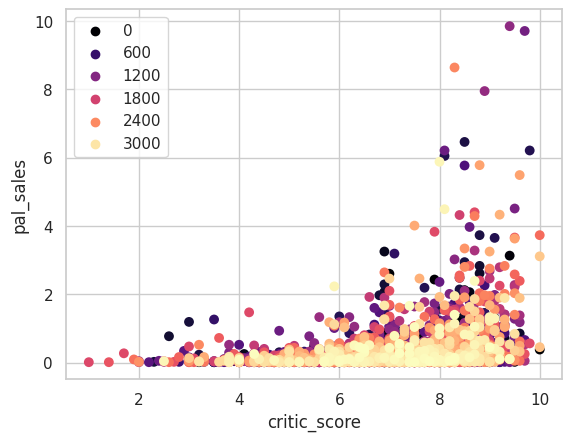

In [7]:
# PAL (European, Australian, New Zealand) sales vs Critic scores:
sns.scatterplot(x='critic_score', y='pal_sales',
               hue=df_vgSales.index, palette='magma', s=50,
               sizes=(10, 6), linewidth=0,
               data=df_vgSales)

# **Prepping for Training**

In [8]:
# As I'm trying to predict critic scores (target) off of sales (features), we'll prep those accordingly:

df_vgSales = df_vgSales.astype(float)
df_numpy = df_vgSales.to_numpy()

print(df_numpy)

[[8.1  0.53 0.49 0.03]
 [9.2  2.91 1.83 0.79]
 [7.   4.1  1.2  2.6 ]
 ...
 [9.2  0.23 0.11 0.1 ]
 [6.5  0.66 0.16 0.4 ]
 [7.2  1.56 0.85 0.55]]


In [9]:
# Organize the dataframe into features (sales) and labels (scores)

features = df_numpy[:,1:4]
labels = df_numpy[:,0]

print('\nFEATURES:\n', features,'\n\nLABELS:\n', labels)


FEATURES:
 [[0.53 0.49 0.03]
 [2.91 1.83 0.79]
 [4.1  1.2  2.6 ]
 ...
 [0.23 0.11 0.1 ]
 [0.66 0.16 0.4 ]
 [1.56 0.85 0.55]] 

LABELS:
 [8.1 9.2 7.  ... 9.2 6.5 7.2]


In [10]:
indices = np.random.permutation(len(labels)) 

X = features[indices]
y = labels[indices]

# **Modelling**

In [11]:
# Splitting the data into 75% training, 25% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

In [12]:
# Let's first make a Linear Regression model to see where things stand.
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, lr_pred)
mse = metrics.mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, lr_pred)

print('LINEAR REGRESSION MODEL\nMean Absolute Error: {:.2f}\nMean Squared Error: {:.2f}\nRoot Mean Squared Error: {:.2f}\nR-squared: {:.2f}'.format(mae, mse, rmse, r2))

LINEAR REGRESSION MODEL
Mean Absolute Error: 1.05
Mean Squared Error: 1.80
Root Mean Squared Error: 1.34
R-squared: 0.11


In [13]:
# Now let's try an SVR model to compare metrics, because the linear regression model isn't great:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)

svr_pred = svr_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, svr_pred)
mse = metrics.mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, svr_pred)

print('SVR MODEL\nMean Absolute Error: {:.2f}\nMean Squared Error: {:.2f}\nRoot Mean Squared Error: {:.2f}\nR-squared: {:.2f}'.format(mae, mse, rmse, r2))

SVR MODEL
Mean Absolute Error: 0.99
Mean Squared Error: 1.70
Root Mean Squared Error: 1.30
R-squared: 0.16


In [14]:
# Finally, let's make a GBR model, since both linear regression and SVR are low
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, gb_pred)
mse = metrics.mean_squared_error(y_test, gb_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, gb_pred)

print('\nGB MODEL\nMean Absolute Error: {:.2f}\nMean Squared Error: {:.2f}\nRoot Mean Squared Error: {:.2f}\nR-squared: {:.2f}'.format(mae, mse, rmse, r2))


GB MODEL
Mean Absolute Error: 1.01
Mean Squared Error: 1.67
Root Mean Squared Error: 1.29
R-squared: 0.17


# **Results**

None of my models performed exceptionally well; I have a couple inklings of ideas why, but it'll take a bit to find a good fit for everything.

The Gradient Boosting Regressor has had the most consistent and best results so far, with a relatively high R-squared metric (usually around 0.10 - 0.19), meaning that the model can account for that respective amount of variance. I need to spend more time preprocessing the data, tuning the hyperparameters, and test out some other models I saw. However, maybe the features I chose just ultimately don't end up working in the way that I'd like them to. This was still a fun dive into ML and statistics, and I would love to revisit this when I have the time and opportunity. 